In [ ]:
# This checks for gradient optimized circuits without noise, what is the effect of noise applied to these solutions

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties
from pylab import *
from sklearn.neighbors import KernelDensity

import joypy
import pandas as pd
from matplotlib import cm

In [35]:
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rc('text', usetex=True)
#rcParams['text.latex.preamble']=[r"\usepackage[helvet]{sfmath}"]

rcParams['text.latex.preamble'] = r"\usepackage[helvet]{sfmath}"


exact=np.min(np.loadtxt("Cop_4x4.txt"))

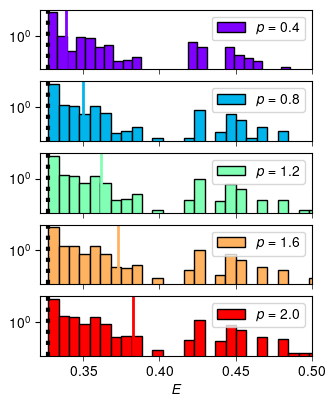

In [36]:

n_bins=300
# We can set the number of bins with the *bins* keyword argument.

# p=0

list=["0.2", "0.4", "0.6", "0.8", "1.0", "1.2", "1.4", "1.6", "1.8", "2.0"]
list=[ "0.4","0.8","1.2","1.6","2.0" ]
X = []
m=0

n = len(list)
colors = plt.cm.rainbow(np.linspace(0,1,n))

fig, axs = plt.subplots(len(list),sharex=True,figsize=(3.5, 4.5))

    
for k in list:
    X.append(np.loadtxt("noisy_samples_entangled_4layers_p_"+k+".txt"))
    exact=np.min(np.loadtxt("Cop_4x4.txt"))
    axs[m].hist(X[m], bins=n_bins,color=colors[m],edgecolor="black", linewidth=1,density=True,label=r"$p="+k+"$",log=True) 
    axs[m].axvline(exact, color="black", linestyle='dotted', linewidth=3)
    axs[m].axvline(X[m].mean(), color=colors[m], linestyle='solid', linewidth=2)
    axs[m].xaxis.set_tick_params(width=0.5)
    plt.xlim(exact-0.005, 0.5)
    #plt.rcParams['axes.linewidth'] = 1
         
    axs[m].legend()
    #plt.show()
    m=m+1
     

plt.xlabel(r"$E$")
plt.savefig("histograms.pdf", format="pdf", bbox_inches="tight")
plt.show()


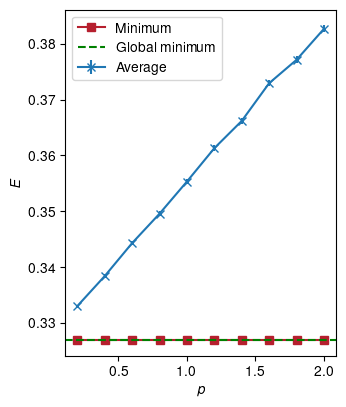

In [38]:
list=["0.2", "0.4", "0.6", "0.8", "1.0", "1.2", "1.4", "1.6", "1.8", "2.0"]
listnum=[ 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
#list=[ "0", "0.4","0.8","1.2","1.6","2.0" ]

X = []
m=0

n = len(list)
colors = plt.cm.RdBu(np.linspace(0,1,n))


mean=[]    
error=[]
mino=[]
for k in list:
    hh=np.loadtxt("noisy_samples_entangled_4layers_p_"+k+".txt")
    mean.append(np.mean(hh))
    m2 =  np.mean(hh**2)
    error.append(np.sqrt(np.abs(np.mean(hh)**2 - np.mean(hh**2)   )/hh.size)) 
    
    mino.append(np.min(hh))
    
    
    m=m+1
plt.figure(figsize=(3.5,4.5))
    
plt.errorbar(listnum,mean,error, marker='x',label ='Average')
plt.plot(listnum,mino,marker='s',color=colors[1],label="Minimum")
plt.axhline(y = exact, color = 'green', linestyle = 'dashed',label="Global minimum") 
plt.ylabel(r"$E$")
plt.xlabel(r"$p$") 
plt.legend()
plt.savefig("averages.pdf", format="pdf", bbox_inches="tight")
plt.show()